In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
#from keras.datasets import mnist
import numpy as np
#(x_train, _), (x_test, _) = mnist.load_data()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
new_folder="Images_without_text"

In [ ]:
#Create train_data,train_labels,test_data,test_labels

import cv2
import os
root_file = "/content/drive/MyDrive/"+str(new_folder)+"/train/"
#only name of the file
traindata = os.listdir(root_file) # 0 and 1 will
train_data = []
train_labels = []
train_image_name = []
# image_size_train =[]
for subfolder in traindata:
  files = os.listdir(root_file + str(subfolder))
  for f in files:
    img = cv2.imread(root_file + str(subfolder) + "/" + str(f))
    img=np.array(img, dtype = 'int32')
    # image_size_train.append(img.shape)
    train_data.append(img)
    train_labels.append(int(subfolder))
    train_image_name.append(f)

# For dev data
root_file = "/content/drive/MyDrive/"+str(new_folder)+"/dev/"
devdata = os.listdir(root_file) # 0 and 1 will come
dev_data = []
dev_labels = []
dev_image_name =[]

for subfolder in devdata:
  files = os.listdir(root_file + str(subfolder))
  for f in files:
    img = cv2.imread(root_file+ str(subfolder) + "/" + str(f))

    dev_data.append(img)
    dev_labels.append(int(subfolder))
    dev_image_name.append(f)

In [ ]:
import numpy as np


In [ ]:
train_data = np.array(train_data, dtype = 'int32')
train_labels = np.array(train_labels, dtype = 'int32')
dev_data = np.array(dev_data, dtype = 'int32')
dev_labels = np.array(dev_labels, dtype = 'int32')

In [ ]:
train_data=train_data/255
train_labels/=255
dev_data/=255
dev_labels/=255

NameError: ignored

In [ ]:
import pickle

In [ ]:
with open('train_data.pkl','wb') as f:
  pickle.dump(train_data, f)

NameError: ignored

In [ ]:
pickled_data = pickle.load(open('/content/autoencoder.pkl', 'rb'))

In [ ]:
print(train_data.shape)
print(train_labels.shape)
print(dev_data.shape)
import matplotlib.pyplot as plt
print(dev_labels.shape)

(8500, 256, 256, 3)
(8500,)
(500, 256, 256, 3)
(500,)


In [ ]:
train_data[1].shape

(256, 256, 3)

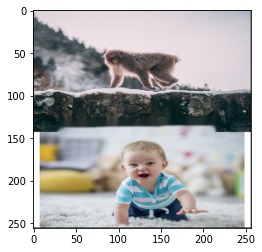

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(train_data[2])

In [ ]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

# The encoding process
input_img = Input(shape=(256, 256, 3))

############
# Encoding #
############

# Conv1 #
x = Conv2D(filters = 256, kernel_size = (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)

# Conv2 #
x = Conv2D(filters = 128, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)

# Conv 3 #
x = Conv2D(filters = 64, kernel_size = (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D(pool_size = (2, 2), padding='same')(x)


# Conv 4 #
x = Conv2D(filters = 32, kernel_size = (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D(pool_size = (2, 2), padding='same')(x)

# Conv 5 #
x = Conv2D(filters = 32, kernel_size = (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D(pool_size = (2, 2), padding='same')(x)

# Note:
# padding is a hyper-arameter for either 'valid' or 'same'.
# "valid" means "no padding".
# "same" results in padding the input such that the output has the same length as the original input.

In [ ]:
############
# Decoding #
############

# DeConv1
x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)

# DeConv2
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

# DeConv3
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# # DeConv4
# x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
# x = UpSampling2D((2, 2))(x)

# # Deconv5
# x = Conv2D(256, (3, 3), activation='relu')(x)
# x = UpSampling2D((2, 2))(x)
# decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [ ]:
# Declare the model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='mse')

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 256)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 128)     295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        73792 

In [ ]:
# Train the model
autoencoder.fit(train_data, train_data,
                epochs=50,
                batch_size=30,
                shuffle=True,
                validation_data=(dev_data, dev_data)
               )

Epoch 1/50
284/284 [==============================] - 134s 430ms/step - loss: -6202398335528060634267648.0000 - val_loss: -24881046805281756485255168.0000
Epoch 2/50
284/284 [==============================] - 122s 429ms/step - loss: -47827293023334431367102464.0000 - val_loss: -70155790064160702357045248.0000
Epoch 3/50
284/284 [==============================] - 122s 431ms/step - loss: -90781076166231278309343232.0000 - val_loss: -112174078863161498380795904.0000
Epoch 4/50
284/284 [==============================] - 122s 430ms/step - loss: -132493471831629785693421568.0000 - val_loss: -153290561684630855554695168.0000
Epoch 5/50
284/284 [==============================] - 122s 430ms/step - loss: -172878384453251932614557696.0000 - val_loss: -193345434384658228033093632.0000
Epoch 6/50
284/284 [==============================] - 122s 430ms/step - loss: -212537187111272687310209024.0000 - val_loss: -232807945238990639389999104.0000
Epoch 7/50
284/284 [==============================] - 122s

In [ ]:
import pickle

In [ ]:
pickle.dump(autoencoder, open('autoencoder.pkl', 'wb'))

In [ ]:
 # load the pickle file
pickled_autoencoder = pickle.load(open('autoencoder.pkl', 'rb'))

In [ ]:
prediction = pickled_autoencoder.predict(dev_data)

16/16 [==============================] - 4s 153ms/step


In [ ]:
prediction.shape

(500, 256, 256, 3)

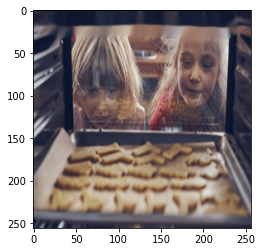

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(dev_data[8])

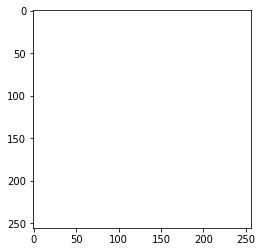

In [ ]:
plt.imshow(prediction[31])